In [1]:
import pandas as pd

#from collections import defaultdict
import matplotlib.pyplot as plt
#from datetime import datetime as dt
#from scipy.signal import lfilter

import meassuresConstants as MC
import processData as prd
import graphFlows as gf

In [2]:
plt.rcParams['font.family'] = 'Gill Sans MT'
plt.rcParams["font.size"] = 18

In [3]:
#For PPTs
plt.rcParams["text.color"] = 'white'

In [2]:
startDate = pd.to_datetime("2022-06-19 00:00:00")
endDate = pd.to_datetime("2022-06-23 00:00:00")

## Process meassurements -----------------------------

In [3]:
#flow meter file
flowDataCsv = '../01-Data/03-FlowmeterData/01-FlowrateMeassurements.csv'

#m3/h
dfFlowsMeassured = prd.processMeassuredData(flowDataCsv, MC.FLOWS_LPS, MC.FLOWS_M3H)

#cuts the flow
dfFlowsMeassuredDWF = dfFlowsMeassured[(dfFlowsMeassured.index >= startDate)&(dfFlowsMeassured.index < endDate)]

# Show flow rate measurements -------------------------------

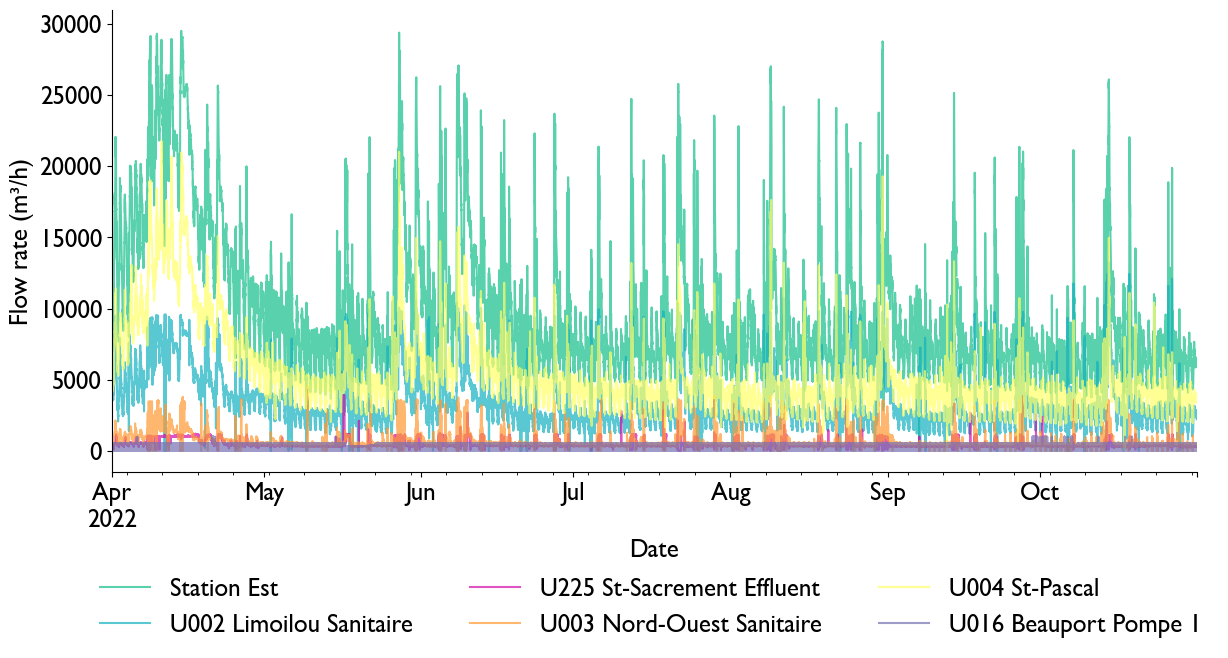

In [36]:
colorsMeassurement = ["#13BE89","#12B1BF","#D40AA8","#FF9933","#FFFF66","#7771B2"]
modelPointsts = dfFlowsMeassured[["Station Est ","U002 Limoilou Sanitaire ","U225 St-Sacrement Effluent ","U003 Nord-Ouest Sanitaire ","U004 St-Pascal ","U016 Beauport Pompe 1 "]]

ax = gf.plotTimeSeries(modelPointsts,'../02-Output/01-Graphs/'+'FlowsMeassured'+'.png',"Flow rate (m³/h)",
                       ppt=False,colorS=colorsMeassurement)

In [5]:
nordOest = dfFlowsMeassured.iloc[:, 2:4].copy()
#ax = gf.plotTimeSeries(nordOest,"nordOest",ppt=False,alpha=1,colorS=["#FFB200","#FF6600"])

limoilou = dfFlowsMeassured.iloc[:, 4:6].copy()
#ax = gf.plotTimeSeries(limoilou,"limoilou",ppt=False,alpha=1,colorS=["#96F8FF","#0D8089"])

sacrament = dfFlowsMeassured.iloc[:, 9:].copy()
#ax = gf.plotTimeSeries(sacrament,"sacrament",ppt=False,alpha=1,
                      # colorS=["#7F236C","#D40AA8","#DA83C8","#FF93E8"],limsY=[-500,8500])

beauport = dfFlowsMeassured.iloc[:, 6:9].copy()
#ax = gf.plotTimeSeries(beauport,"beauport",ppt=False,alpha=1,colorS=["#7771B2","#48418E","#D4D0FC"],
                      # points=True)


# Model data ----------------------------------------------------

In [14]:
# values are in m3/s
flowModelDataCsv = '../01-Data/04-PCSWMMResults/02-ModelFlowsDWF2022Complete.csv' #VALUES 2022 DWF

#renameCols = {PSC.WTP: GC.WTP, PSC.STSACRA_TO_LIMOLIOU: GC.STSACRA_TO_LIMOLIOU, PSC.PASCAL:GC.PASCAL}
flowModel2022Valsm3h = prd.processSWMMOutFlowData(flowModelDataCsv, startDate, endDate)

#ax = gf.plotTimeSeries(flowModel2022Valsm3h,'../02-Output/01-Graphs/'+'FlowsDWFSWMM'+'.png',ppt=True,colorS=colorSeries)

# WEST DATA ------------------

In [8]:
#WEST_WTP_csv = '../01-Data/02-WESTResults/01-46SectionsCompleteResults.csv'
WEST_WTP_csv = '../01-Data/02-WESTResults/02-OneBranch157Tanks.csv'

#dictRename = {WTPName:WTP_WEST+UNITS_FLOW,NO_CATCH_WEST:NO_WEST+UNITS_FLOW}

dfWEST_Results = prd.getDFWESTResults(WEST_WTP_csv,startDate,endDate)

#assert prd.checkCorrectFlowWEST(dfWEST_Results), "The flows are not incrementing downstream"


# Comparisons -----

In [8]:

WESTToSWMMCOLS46= [['4 (Out)','DOM_12589'],
                 ['6 (In)','UNI_8693'],
                 ['16 (Out)','UNI_13121'],
                 ['19 (Out)','UNI_12850'],
                 ['26 (Out)','C21'],
                 ['28 (Out)','UNI_1208035'],
                 ['30 (In)','UNI_18294'],
                 ['32 (In)','UNI_18251'],
                 ['33 (In)','DOM_18248'],
                 ['34 (In)','DOM_608355'],
                 ['35 (In)','DOM_15610'],
                 ['36 (In)','DOM_15368'],
                 ['41 (In)','DOM_20726'],
                 ['42 (In)','DOM_23809'],
                 ['45 (Out)','DOM_1631422'],
                 ['46 (Out)','DOM_1631424']]

# Needs cleaning --------------------------------------------------

In [11]:
STATION_EST_WEST_MANUAL = '.Well_9.Q_Out'

WEST_WTP_Manual_csv = '01-Data/04-ResultsManualOldWESTModel/05-ResultsBPWithInfiltration.csv'

dfWEST_Manual_Results = getDFWESTResults(WEST_WTP_Manual_csv,startDate,endDate,STATION_EST_WEST_MANUAL)

NameError: name 'getDFWESTResults' is not defined

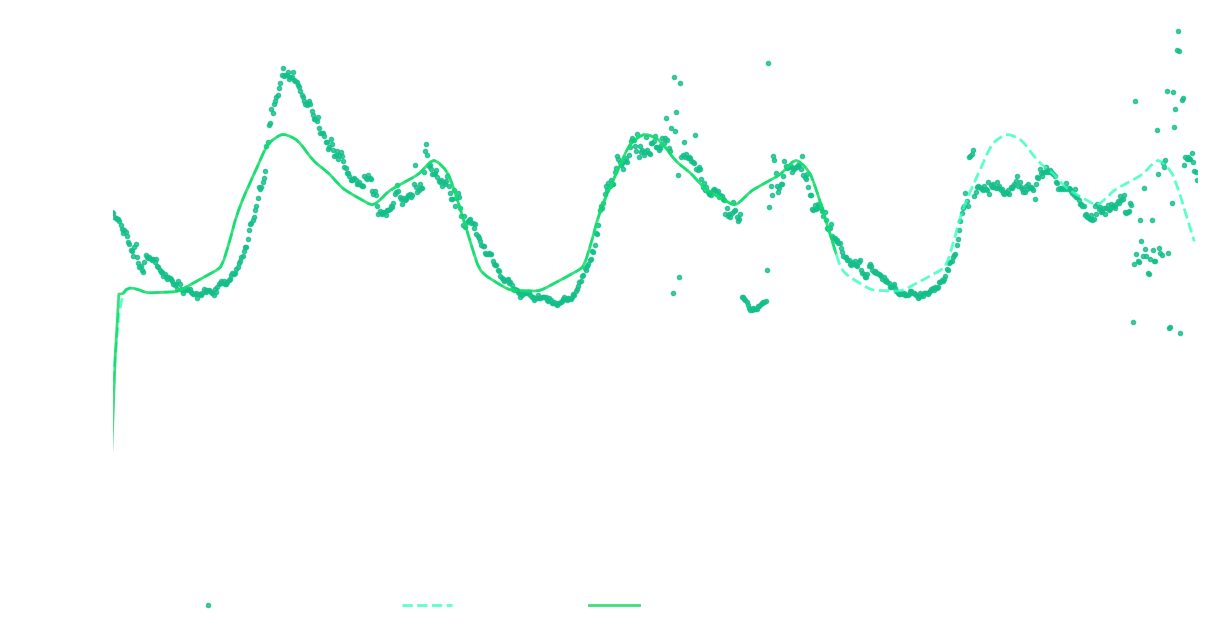

In [ ]:
measured = dfFlowsm3hDWF[[ESTA_ME]].copy()
measured.rename(columns={measured.columns[0]:"Measured"},inplace=True)

westOriginal = dfWEST_Results[[WTP_WEST+" (m3/h)"]].copy()
westOriginal.rename(columns={westOriginal.columns[0]:"Legacy"},inplace=True)

westManual = dfWEST_Manual_Results[[WTP_WEST+" (m3/h)"]].copy()
westManual.rename(columns={westManual.columns[0]:"Basic Parameters & 0.25 Infiltration"},inplace=True)

plotComparisonsWEST(measured,westOriginal,westManual,"BasicParametersInfiltra",[EST_C,EST_C2,EST_C3])

In [ ]:
STATION_EST_WEST_MANUAL = '.Qin_GC.Q_In'

WEST_WTP_OLDModified_csv = '01-Data/03-ResultsOldWESTModel(DWF)/05-WESTFlowResults(modifiedkto2).csv'

dfWEST_Manual_Results = getDFWESTResults(WEST_WTP_OLDModified_csv,startDate,endDate,STATION_EST_WEST_MANUAL)

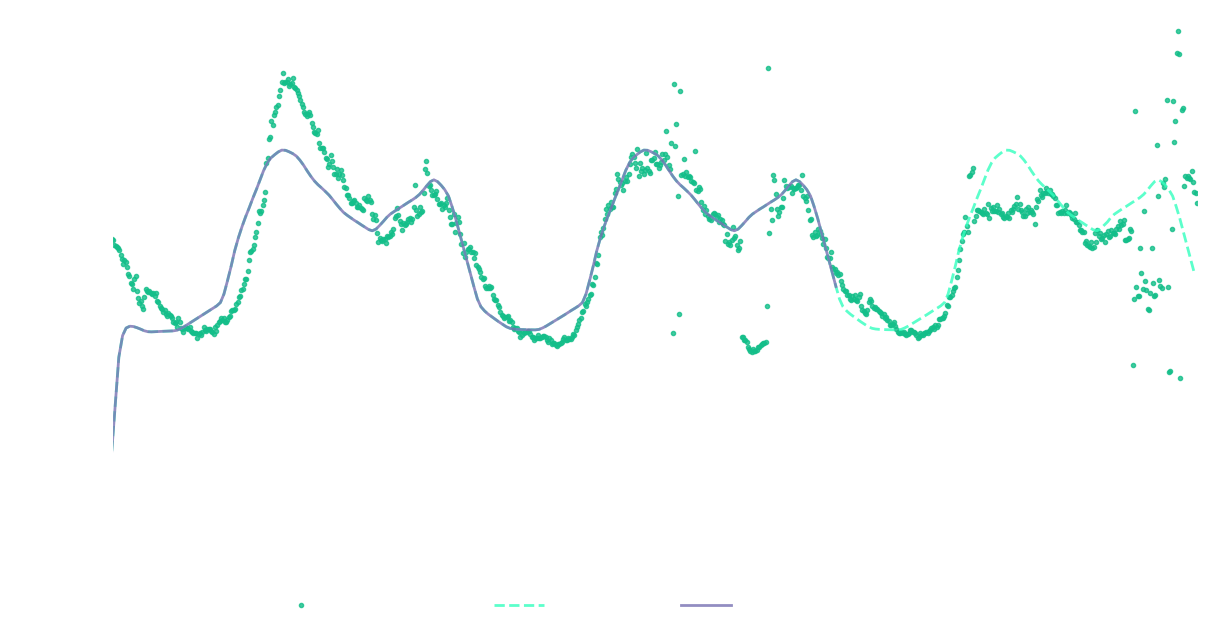

In [ ]:
measured = dfFlowsm3hDWF[[ESTA_ME]].copy()
measured.rename(columns={measured.columns[0]:"Measured"},inplace=True)

westOriginal = dfWEST_Results[[WTP_WEST+" (m3/h)"]].copy()
westOriginal.rename(columns={westOriginal.columns[0]:"Legacy"},inplace=True)

westManual = dfWEST_Manual_Results[[WTP_WEST+" (m3/h)"]].copy()
westManual.rename(columns={westManual.columns[0]:"Basic Parameters"},inplace=True)

plotComparisonsWEST(measured,westOriginal,westManual,"BasicParameters",[EST_C,EST_C2,BEAU_C])

In [4]:
WEST_WTP_csv = '../01-Data/02-WESTResults/02-OneBranch157Tanks.csv'

dfWEST_Results = prd.getDFWESTResults(WEST_WTP_csv,startDate,endDate)

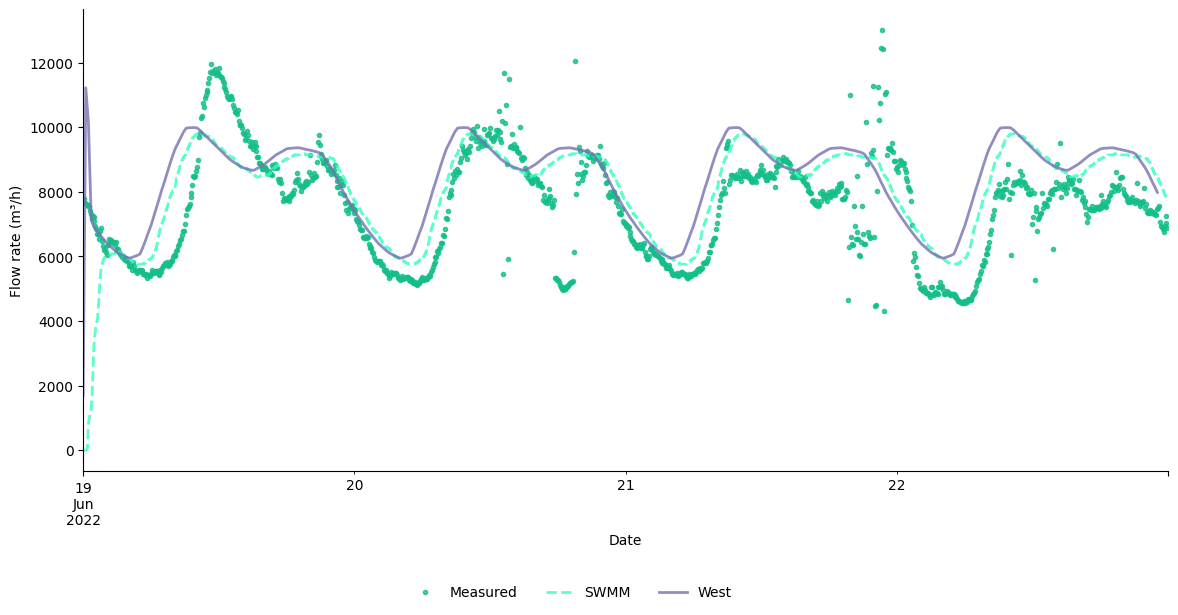

In [18]:

import PCSWMMConstants as SWMM_C
import graphConstants as G_C


measured = dfFlowsMeassuredDWF[[MC.ESTA_ME]].copy()
measured.rename(columns={measured.columns[0]:"Measured"},inplace=True)

swmm = flowModel2022Valsm3h[[SWMM_C.WTP]].copy()
swmm.rename(columns={swmm.columns[0]:"SWMM"},inplace=True)

west = dfWEST_Results[["16 (Out)"]].copy()
west.rename(columns={west.columns[0]:"West"},inplace=True)

gf.plotThreeTSeriesComparison(measured,swmm,west,"WEST_SWMM_MEASS",[G_C.EST_C,G_C.EST_C2,G_C.BEAU_C])

# CLean!! -----------------------------------

In [3]:
WEST_WTP_csv = '../01-Data/02-WESTResults/03-OneBranch157TanksTSS.csv'

dfWEST_FLOW, dfWEST_TSS = prd.getDFWESTResults(WEST_WTP_csv, startDate, endDate)

branchConvertion = ['179 (In)','191 (In)','192 (Out)','35 (In)', '34 (In)']
dfWEST_FLOW_branch = dfWEST_FLOW[branchConvertion]
dfWEST_Trunk = dfWEST_FLOW.loc[:, ~dfWEST_FLOW.columns.isin(branchConvertion)]

branchConvertionTSS = ['191 (In)','192 (Out)','35 (In)', '34 (In)']
dfWEST_FLOW_branch = dfWEST_TSS[branchConvertionTSS]
dfWEST_Trunk = dfWEST_TSS.loc[:, ~dfWEST_TSS.columns.isin(branchConvertion)]

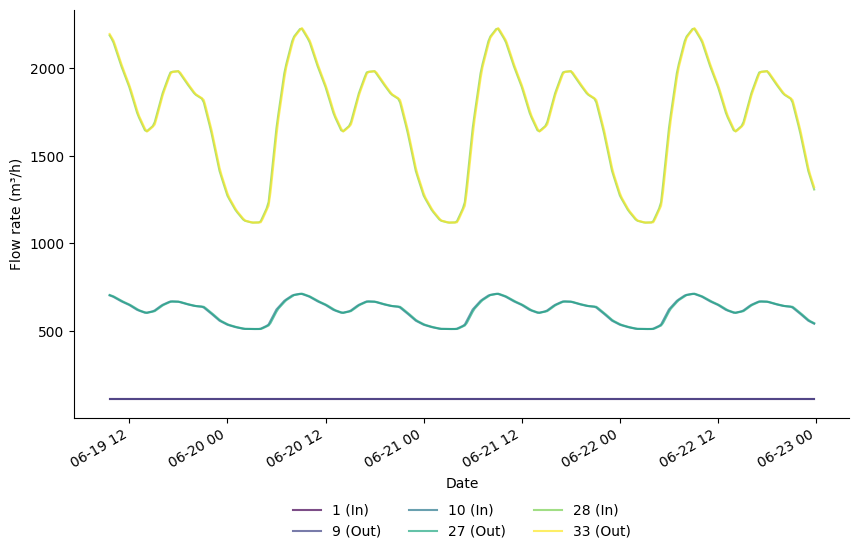

: 

In [28]:
ax = gf.plotTimeSeries(dfWEST_Trunk,'../02-Output/01-Graphs/'+'FlowsWEST'+'.png',"Flow rate (m³/h)")
ax = gf.plotTimeSeries(dfWEST_FLOW_branch,'../02-Output/01-Graphs/'+'FlowsWESTSubSet'+'.png',"Flow rate (m³/h)")

The column with error is:  1


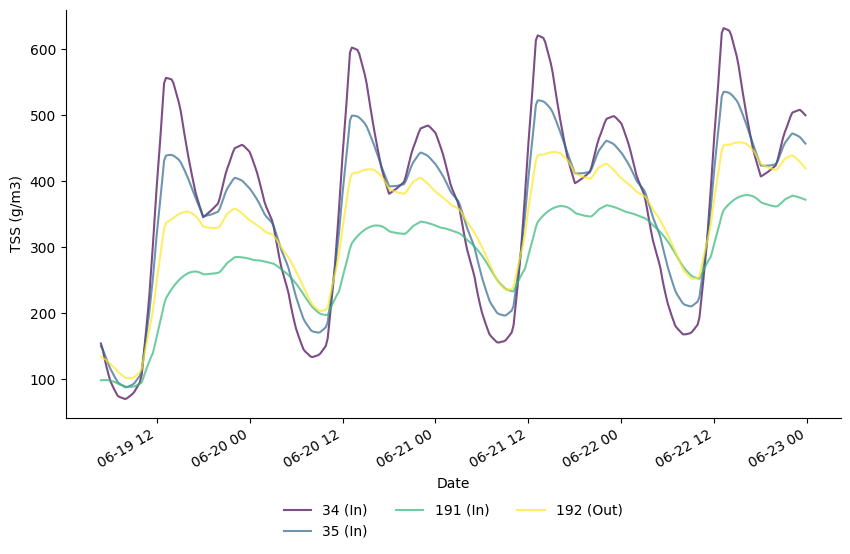

In [13]:
ax = gf.plotTimeSeries(dfWEST_Trunk,'../02-Output/01-Graphs/'+'TSSsWEST'+'.png',"TSS (g/m3)")
ax = gf.plotTimeSeries(dfWEST_FLOW_branch,'../02-Output/01-Graphs/'+'TSSsWEST'+'.png',"TSS (g/m3)")

In [5]:
WEST_WTP_csv2 = '../01-Data/02-WESTResults/04-Limit10.csv'

dfWEST_FLow10, dfWEST_TSS10 = prd.getDFWESTResults(WEST_WTP_csv2,startDate,endDate)

In [6]:
startDate2 = pd.to_datetime("2022-06-20 00:00:00")

dfWEST_FLOW = dfWEST_FLOW[(dfWEST_FLOW.index >= startDate2)]
dfWEST_TSS = dfWEST_TSS[(dfWEST_TSS.index >= startDate2)]
dfWEST_FLow10 = dfWEST_FLow10[(dfWEST_FLow10.index >= startDate2)]
dfWEST_TSS10 = dfWEST_TSS10[(dfWEST_TSS10.index >= startDate2)]

In [19]:
WESTToSWMMCOLS157=[['1 (In)', 'UNI_5277'],
                   ['10 (In)', 'UNI_602607'],
                   ['28 (In)', 'UNI_18251'],
                   ['34 (In)', 'U002_Pompe_IREU'],
                   ['35 (In)', 'DOM_1640876'],
                   ['36 (In)', 'R006023'],
                   ['180 (In)', 'E-12-26'],
                   ['192 (In)', 'E-12']]
#Agregar Well 16 y well 7 

WESTToWESTCOLSLIM10=[['1 (In)', '1 (In)'],
                   ['10 (In)', '10 (In)'],
                   ['20 (In)', '28 (In)'],
                   ['26 (In)', '34 (In)'],
                   ['27 (In)', '35 (In)'],
                   #['28 (In)', '179 (In)'],
                   ['38 (In)', '191 (In)'],
                   ['48 (In)', '192 (Out)']]




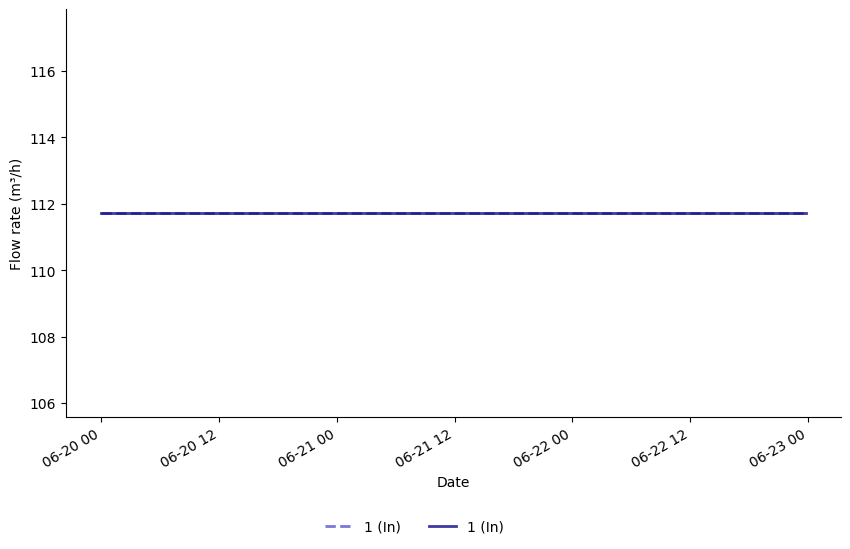

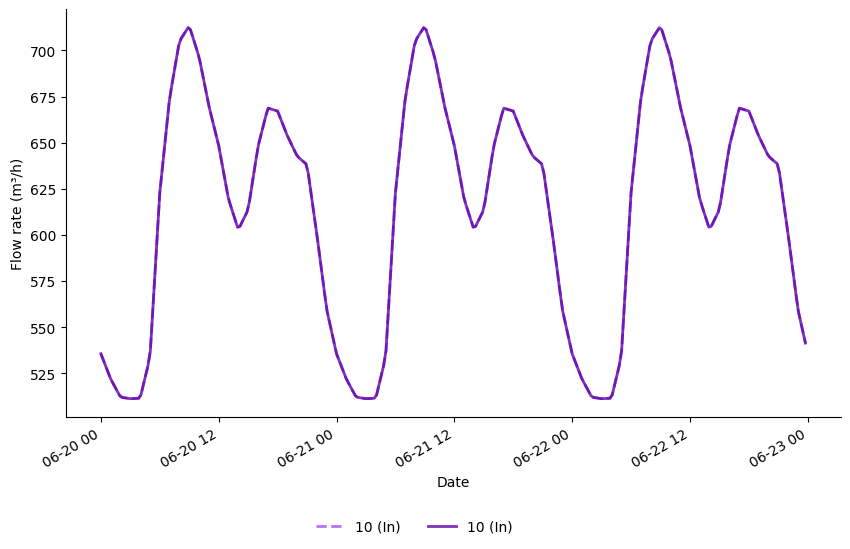

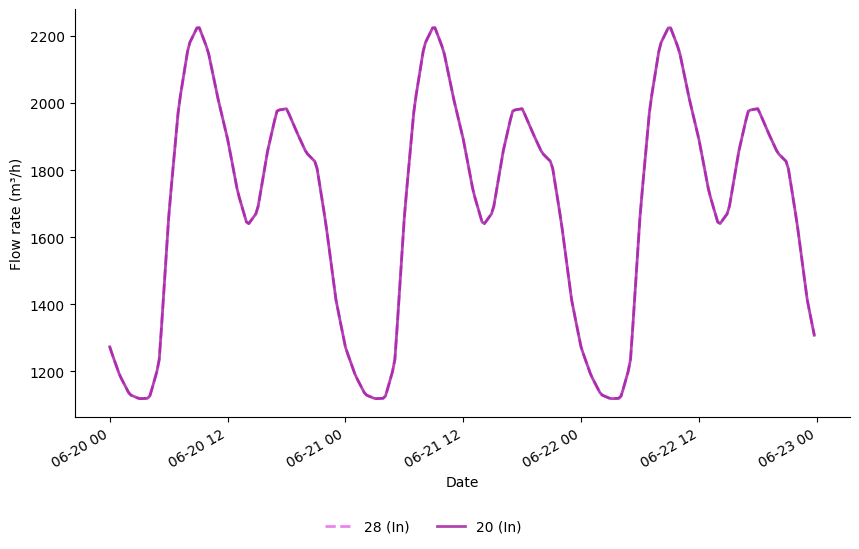

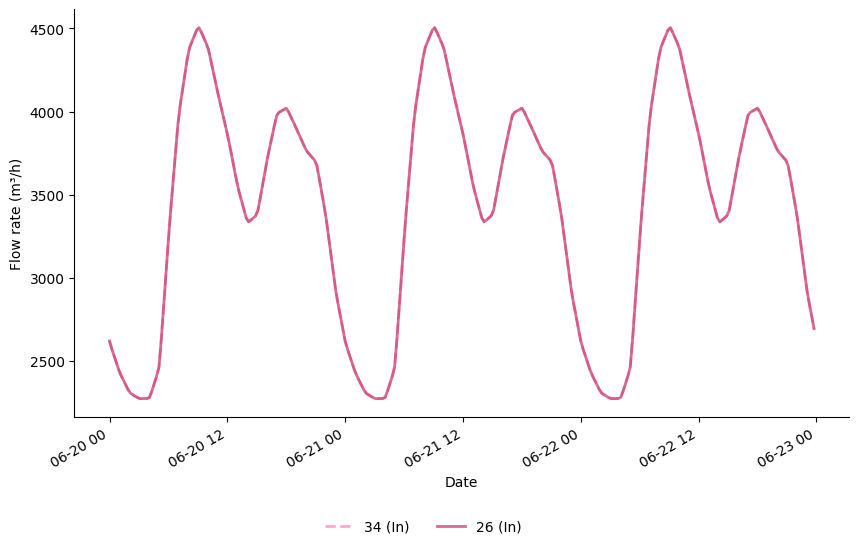

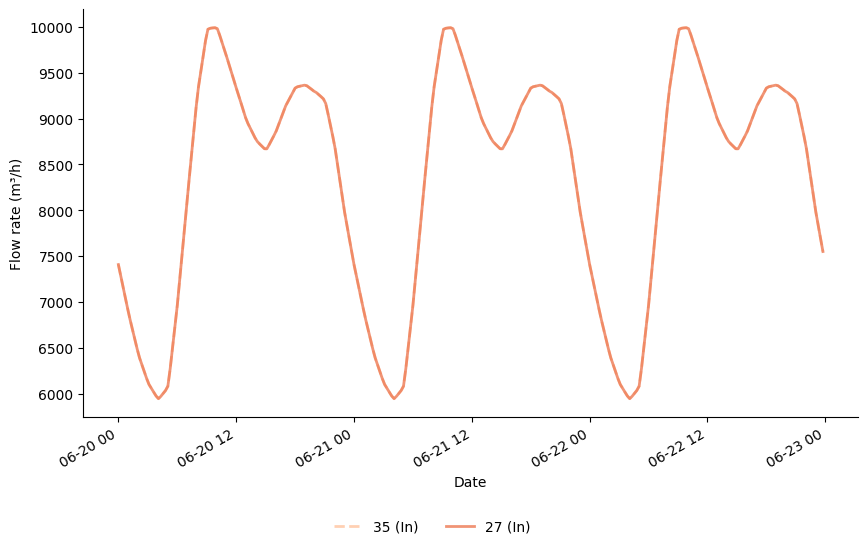

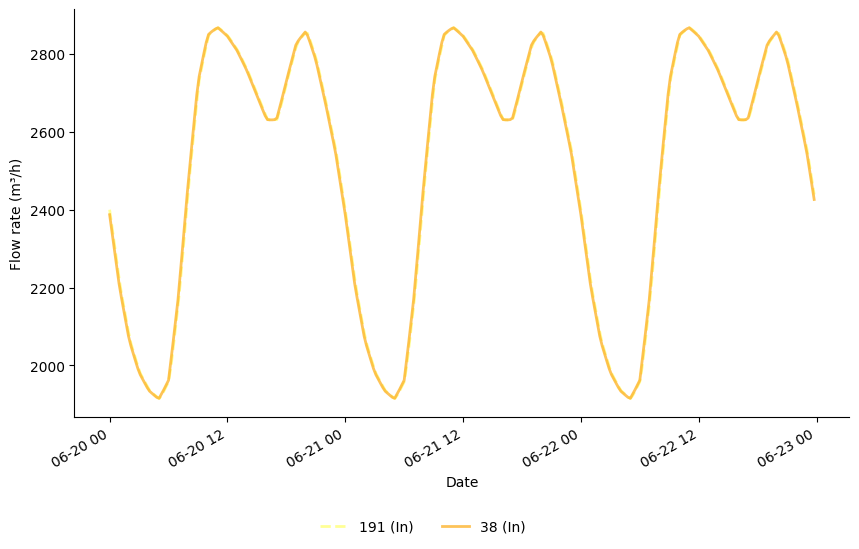

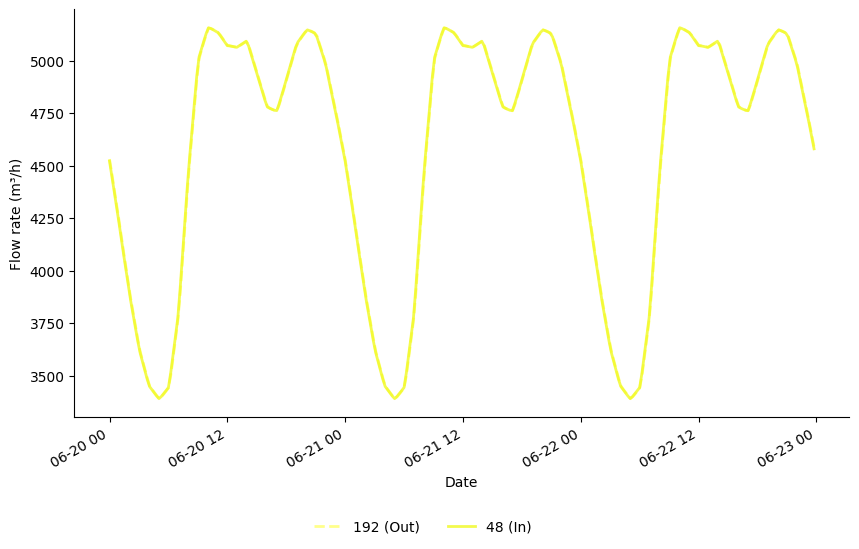

In [8]:
gf.plotVariousComparisons(WESTToWESTCOLSLIM10,dfWEST_FLow10,dfWEST_FLOW,"../02-Output/01-Graphs/","Flow rate (m³/h)")

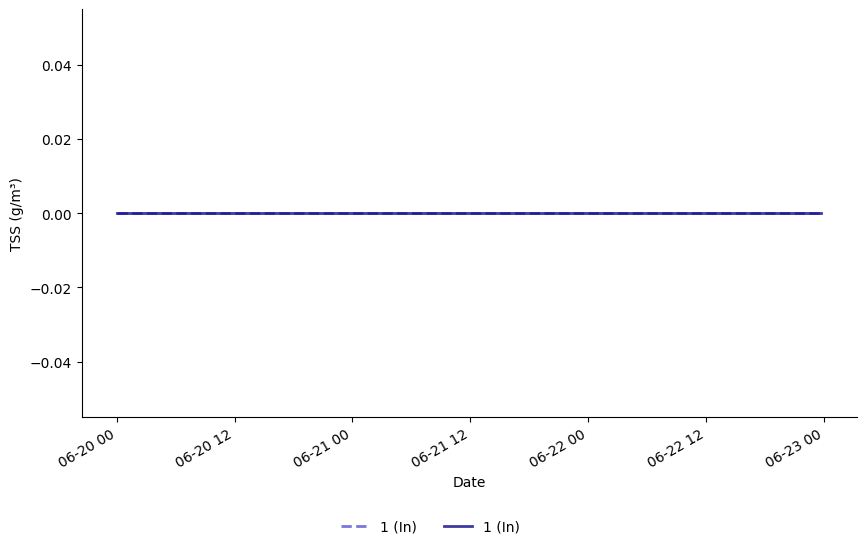

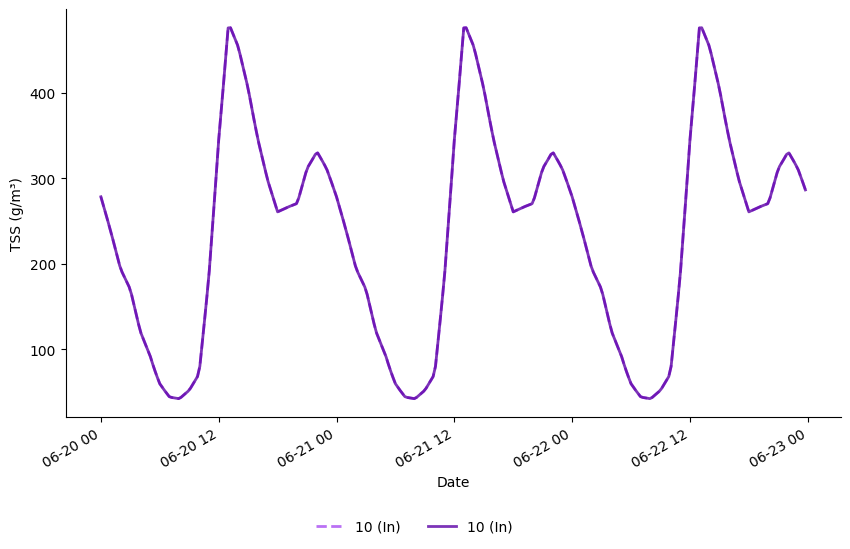

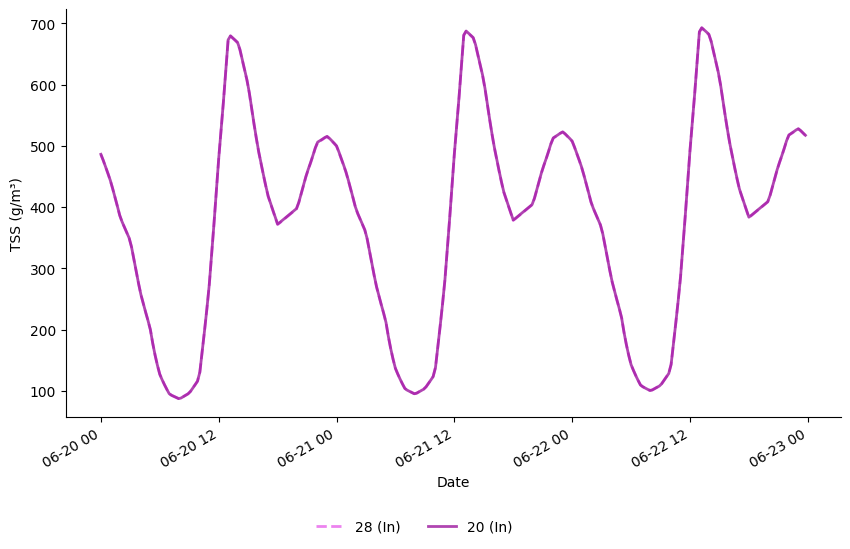

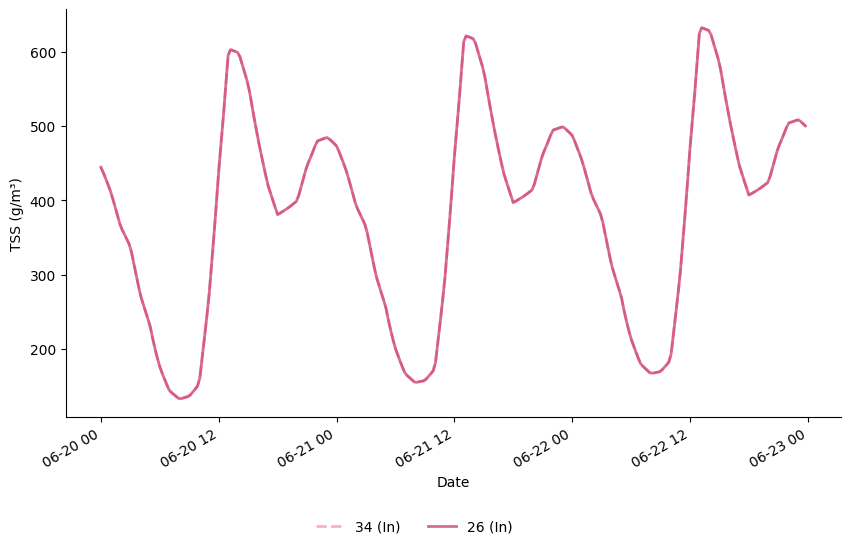

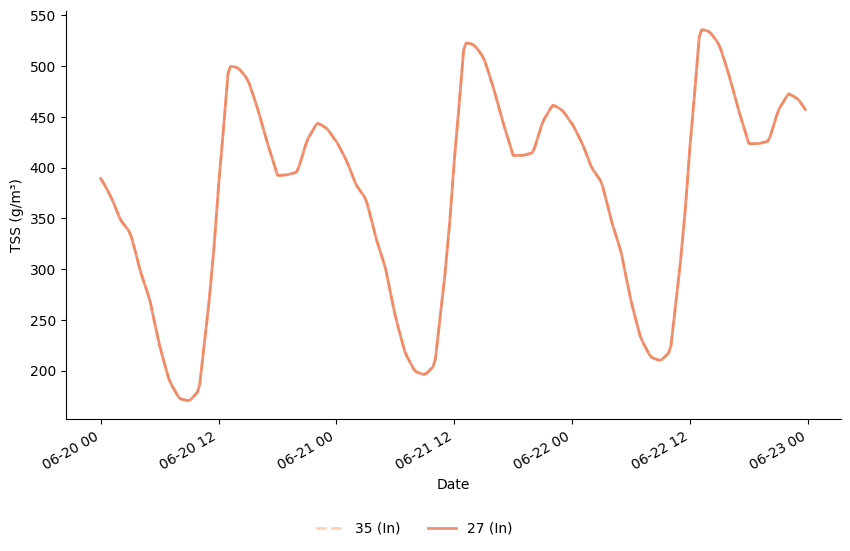

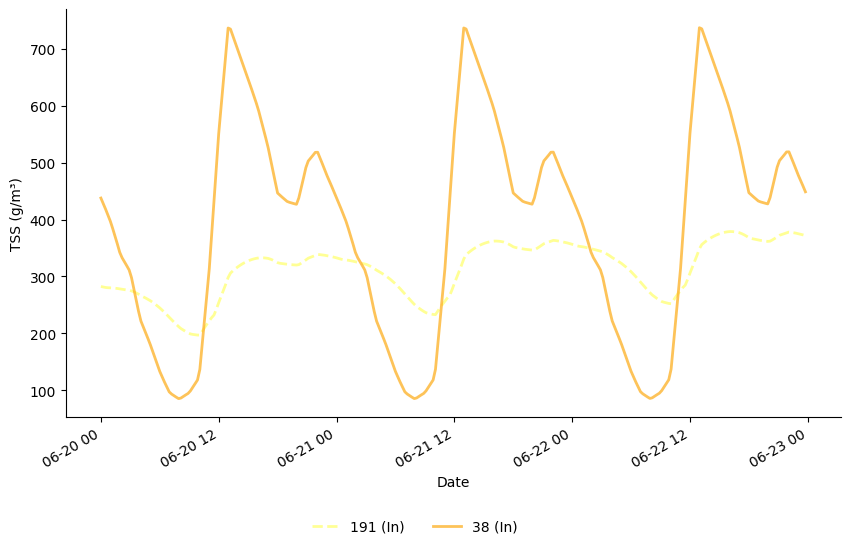

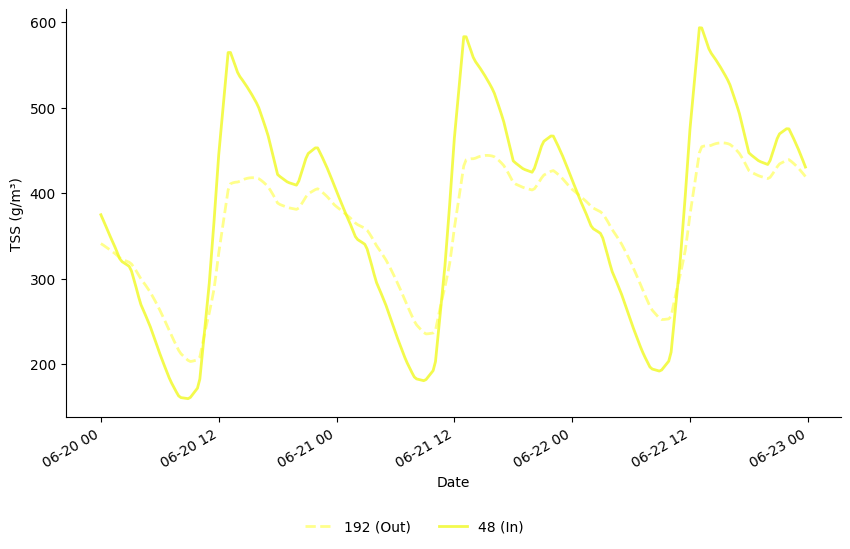

In [9]:
gf.plotVariousComparisons(WESTToWESTCOLSLIM10,dfWEST_TSS10,dfWEST_TSS,"../02-Output/02-GraphsTSS/","TSS (g/m³)")

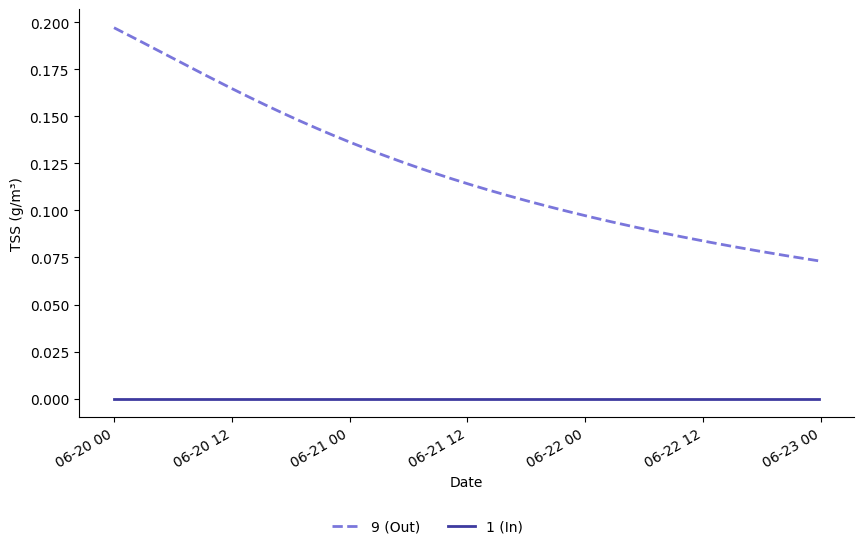

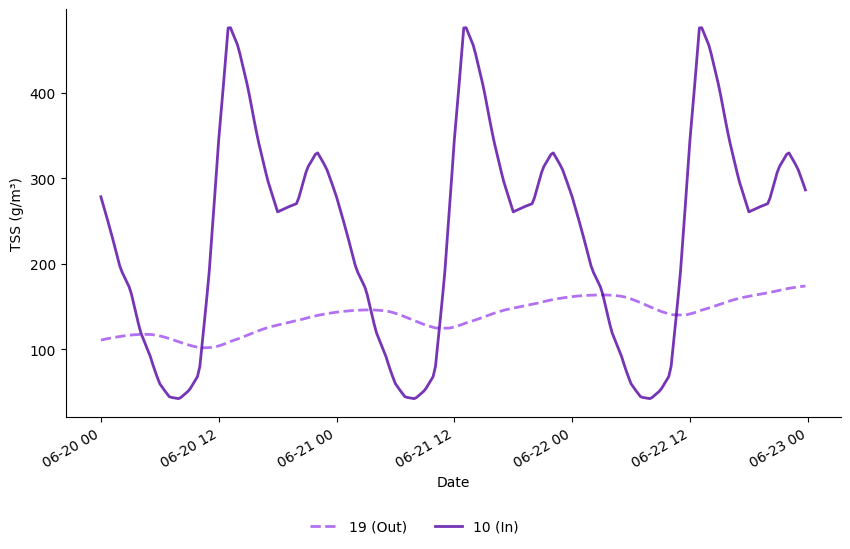

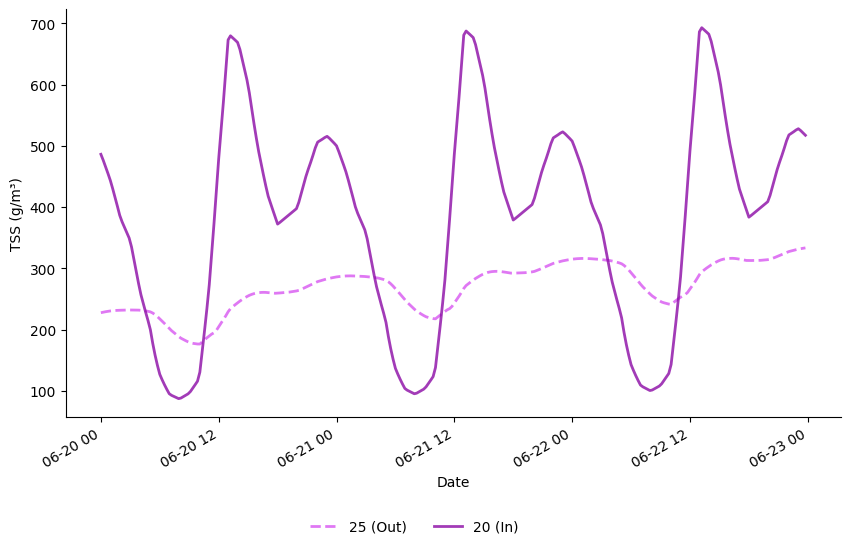

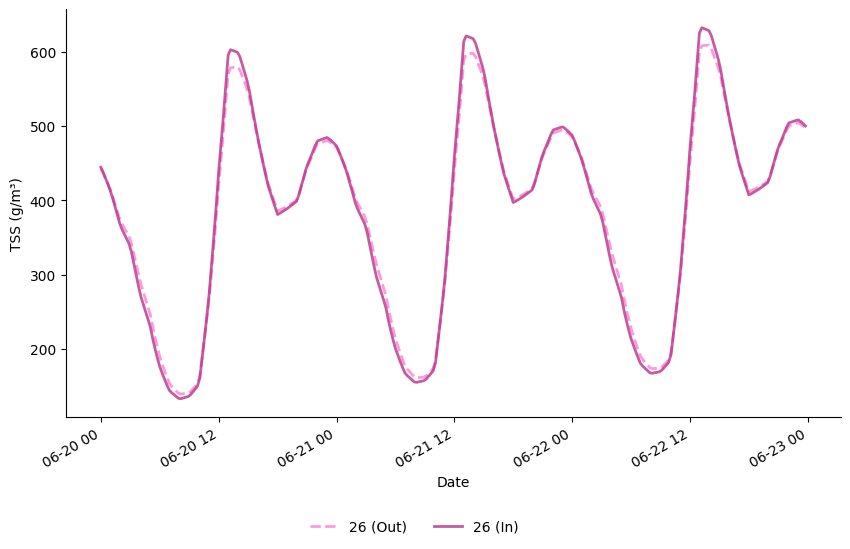

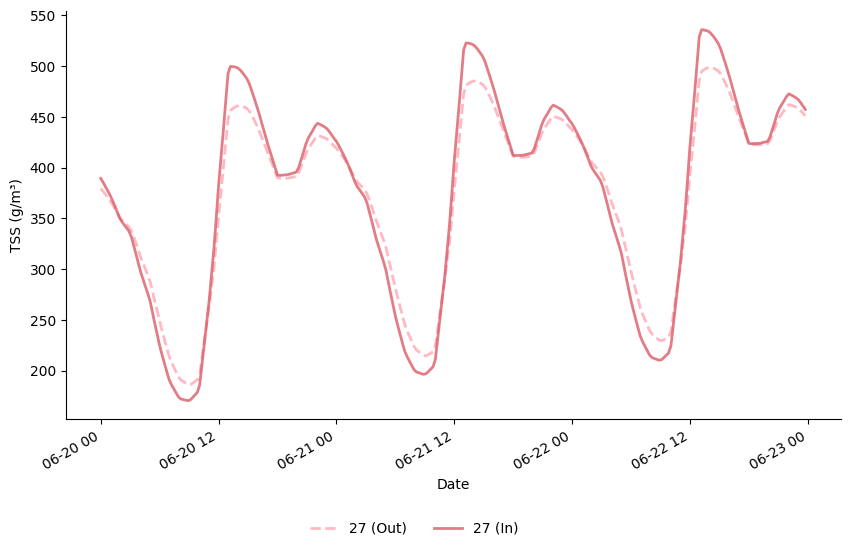

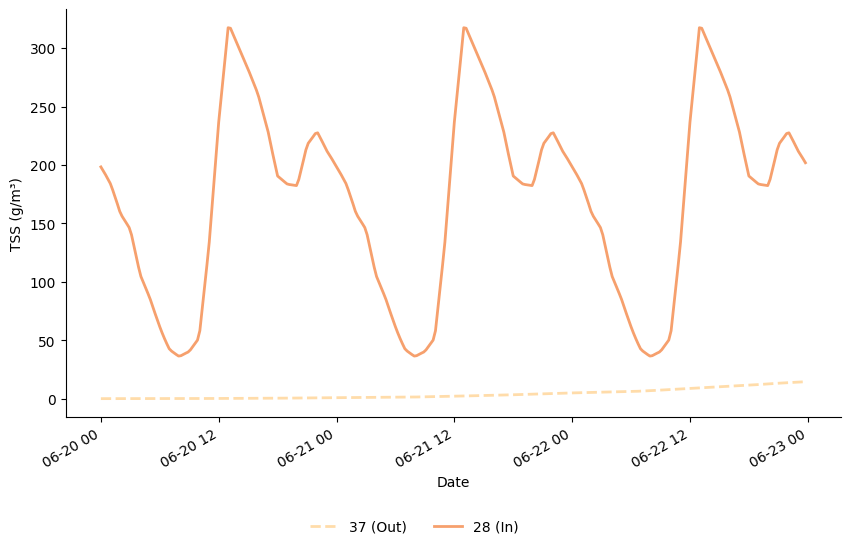

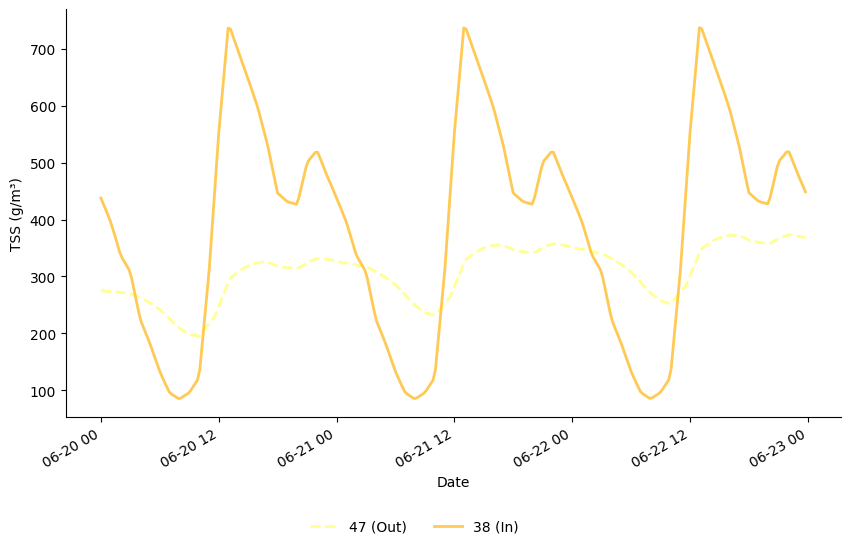

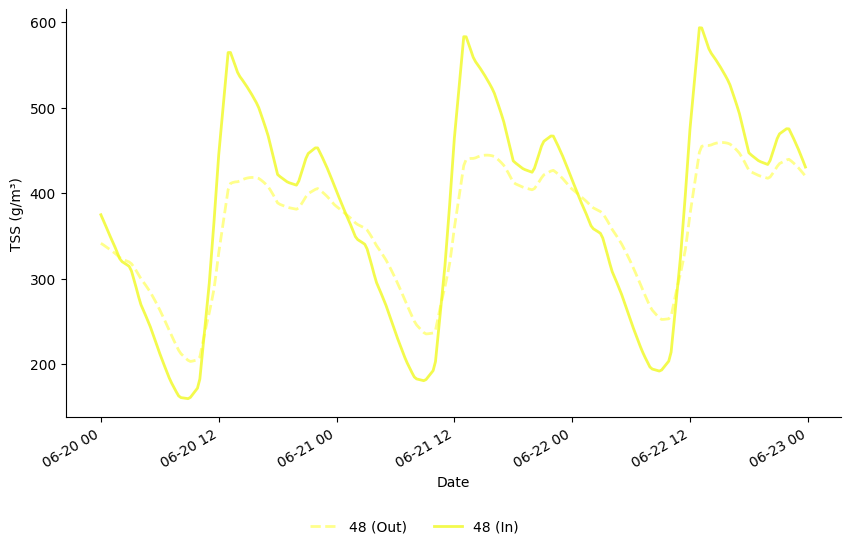

In [12]:
INandOUT=[['1 (In)', '9 (Out)'],
        ['10 (In)', '19 (Out)'],
        ['20 (In)', '25 (Out)'],
        ['26 (In)', '26 (Out)'],
        ['27 (In)', '27 (Out)'],
        ['28 (In)', '37 (Out)'],
        ['38 (In)', '47 (Out)'],
        ['48 (In)', '48 (Out)']]

gf.plotVariousComparisons(INandOUT,dfWEST_TSS10,dfWEST_TSS10,"../02-Output/02-GraphsTSS/","TSS (g/m³)")

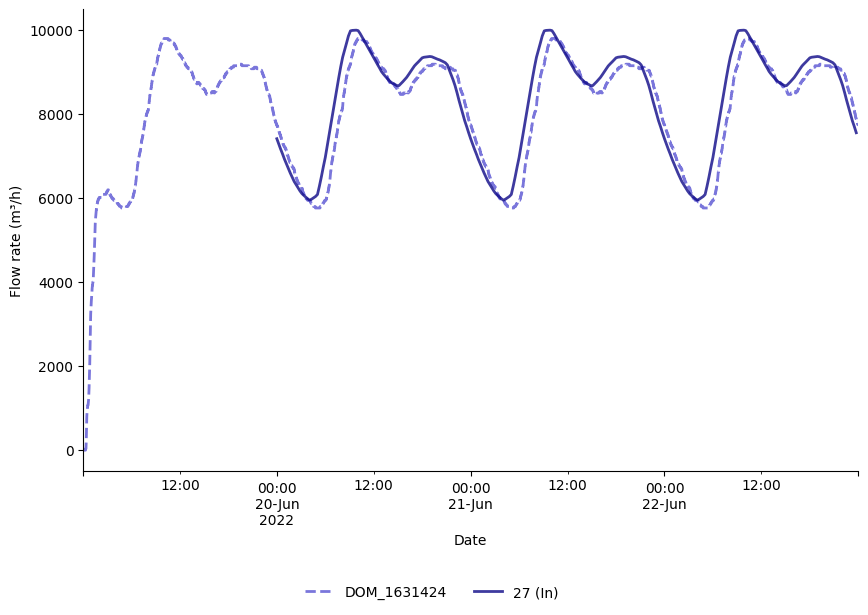

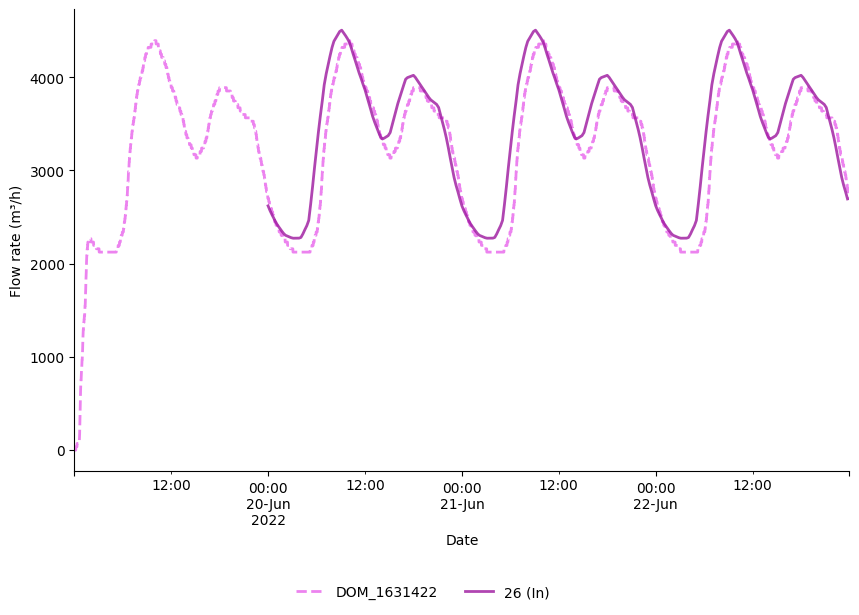

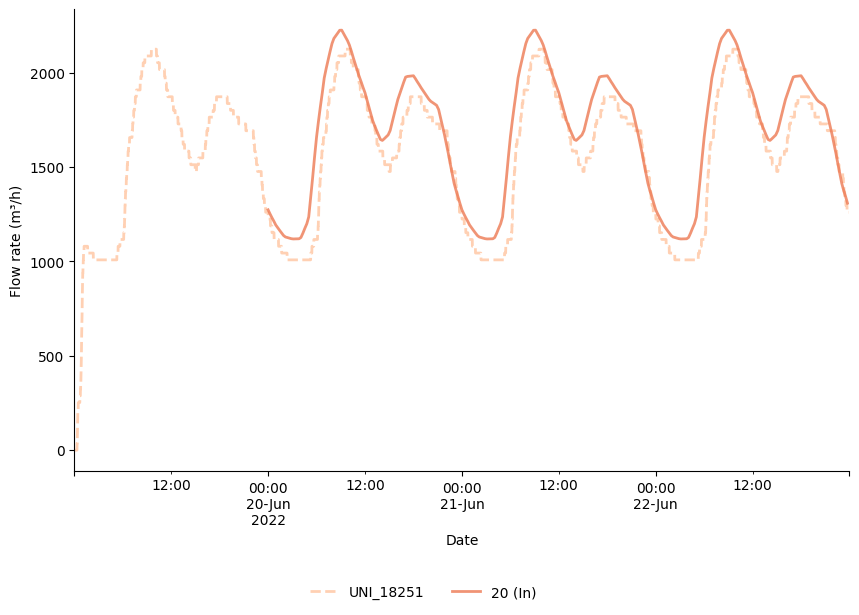

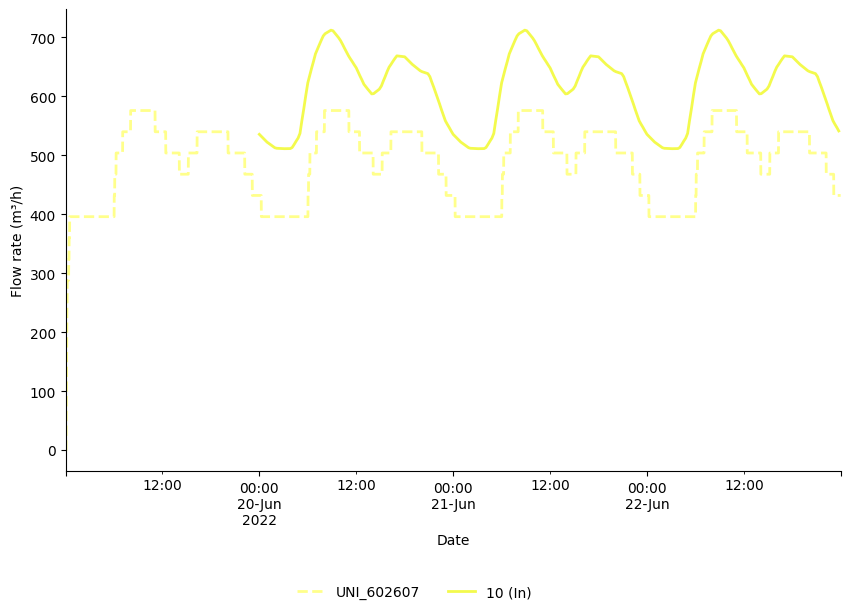

In [20]:
WESTToSWMMCOLSLIM10 = [['27 (In)' , 'DOM_1631424'],
                        ['26 (In)' , 'DOM_1631422'],
                        ['20 (In)', 'UNI_18251'],
                        ['10 (In)' , 'UNI_602607']] #problems here check swmm values

gf.plotVariousComparisons(WESTToSWMMCOLSLIM10,dfWEST_FLow10,flowModel2022Valsm3h,"../02-Output/01-Graphs/","Flow rate (m³/h)")